# Circadian rhythm disruptions

In [ ]:
#| hide 
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks 
from circadian.lights import LightSchedule
from circadian.models import Forger99, Jewett99, Hannay19, Hannay19TP

Light exposure is one of the main factors affecting circadian rhythms. Here we use the `circadian` package to explore the effects of light pulses at different times of the day. We will explore this effect using four different circadian models `Forger99`, `Jewett99`, `Hannay19`, and `Hannay19TP` and compare the results among them.

# Entraining models to a regular light schedule

First, we entrain each model to a regular light schedule to have a baseline to compare to. In `circadian` we do this by

In [ ]:
dt = 0.1 # hours
days = 20
time = np.arange(0, 24 * days, dt)
regular_lux = 500
schedule = LightSchedule.Regular(regular_lux, lights_on=8, lights_off=24)
light_input = schedule(time)
model_list = [Forger99(), Jewett99(), Hannay19(), Hannay19TP()]
equilibrium_states = []

for model in model_list:
    time_eq = np.arange(0, 24 * days, dt)
    final_state = model.equilibrate(time_eq, light_input, num_loops=2)
    equilibrium_states.append(final_state)

# Pulse during the day

Next, we can explore how models respond to lights pulse during the bright hours of the day. We can use the `LightSchedule.from_pulse` function to add pulses at different times

In [ ]:
days = 3
time = np.arange(0, 24 * days, dt)
pulse_num = 6
pulse_lux = 1e4
pulse_duration = 1 # hour
start_values = np.linspace(32, 47, pulse_num)

simulation_result = {}

for idx,model in enumerate(model_list):
    simulation_result[str(model)] = {}
    for pulse_start in start_values:
        schedule = LightSchedule.Regular(regular_lux, lights_on=8, lights_off=24)
        schedule += LightSchedule.from_pulse(pulse_lux, pulse_start, pulse_duration)
        light_input = schedule(time)
        trajectory = model(time, equilibrium_states[idx], light_input)
        simulation_result[str(model)][str(pulse_start)] = {
            'light': light_input,
            'trajectory': trajectory
        }

In [ ]:
#| hide
# Generate and save figures
time = time / 24.0

legend_elements = [plt.Rectangle((0, 0), 1, 1, fc='gray', alpha=0.3, ec='black'),
                   plt.Rectangle((0, 0), 1, 1, fc='white', alpha=0.3, ec='black'),
                   plt.Rectangle((0, 0), 1, 1, fc='yellow', alpha=0.3, ec='black'),
                   plt.Line2D([0], [0], color='tab:blue', lw=1),]

for model in model_list:
    figsize_factor = 0.8
    fig, axs = plt.subplots(pulse_num, 1, sharex=True, figsize=(figsize_factor * 15, figsize_factor * 8))

    for idx,start in enumerate(start_values):
        light = simulation_result[str(model)][str(start)]['light']
        trajectory = simulation_result[str(model)][str(start)]['trajectory']

        if str(model) == 'Hannay19':
            y = trajectory.states[:, 0] * np.cos(trajectory.states[:, 1])
        elif str(model) == 'Hannay19TP':
            y = trajectory.states[:, 0] * np.cos(trajectory.states[:, 2])
        elif str(model) in ['Forger99', 'Jewett99']:
            y = trajectory.states[:, 0]

        min_y = 1.5 * min(y)
        max_y = 1.5 * max(y)
        axs[idx].fill_between(time, min_y, max_y, where=light == 0, color='gray', alpha=0.3, edgecolor='None')
        axs[idx].fill_between(time, min_y, max_y, where=light >= pulse_lux-1, color='yellow', alpha=0.3)
        axs[idx].plot(time, y)
        axs[idx].set_ylim(min_y, max_y)
        axs[idx].set_xlim(min(time), max(time)-0.5)
        axs[idx].spines['top'].set_visible(False)
        axs[idx].set_yticks([])
        axs[idx].set_yticklabels([])

    axs[-1].set_xlabel('Days', fontsize=13)
    axs[-1].set_xticks(np.arange(0, 3, 1))
    axs[-1].set_xticklabels(np.arange(0, 3, 1), fontsize=13)
    axs[0].legend(legend_elements, ['Darkness (0 lux)', 'Daylight (500 lux)', 'Pulse (10.000 lux)', 'Core body temperature'], 
                loc='upper left', bbox_to_anchor=(0.05, 1.5), ncols=4, frameon=False, fontsize=11)

    fig.subplots_adjust(hspace=-0.1)
    fig.savefig(f'00_figs/{str(model)}_day_pulses.png', dpi=300, bbox_inches='tight')
    plt.close()

::: {.panel-tabset}

## Forger99

![](00_figs/Forger99_day_pulses.png)

## Jewett99

![](00_figs/Jewett99_day_pulses.png)

## Hannay19

![](00_figs/Hannay19_day_pulses.png)

## Hannay19TP

![](00_figs/Hannay19TP_day_pulses.png)

:::

We see that light pulses during bright hours don't have a major effect on circadian rhythms. However, this is not the case for light pulses during darkness.

# Pulse at night

Using the same code as above but with different pulse start values

In [ ]:
start_values = np.linspace(24, 31, pulse_num)

In [ ]:
#| hide
days = 3
time = np.arange(0, 24 * days, dt)
pulse_num = 6
pulse_lux = 1e4
pulse_duration = 1 # hour

simulation_result = {}

for idx,model in enumerate(model_list):
    simulation_result[str(model)] = {}
    for pulse_start in start_values:
        schedule = LightSchedule.Regular(regular_lux, lights_on=8, lights_off=24)
        schedule += LightSchedule.from_pulse(pulse_lux, pulse_start, pulse_duration)
        light_input = schedule(time)
        trajectory = model(time, equilibrium_states[idx], light_input)
        simulation_result[str(model)][str(pulse_start)] = {
            'light': light_input,
            'trajectory': trajectory
        }

In [ ]:
#| hide
# Generate and save figures for night pulses
time = time / 24.0

legend_elements = [plt.Rectangle((0, 0), 1, 1, fc='gray', alpha=0.3, ec='black'),
                   plt.Rectangle((0, 0), 1, 1, fc='white', alpha=0.3, ec='black'),
                   plt.Rectangle((0, 0), 1, 1, fc='yellow', alpha=0.3, ec='black'),
                   plt.Line2D([0], [0], color='tab:blue', lw=1),]

for model in model_list:
    figsize_factor = 0.8
    fig, axs = plt.subplots(pulse_num, 1, sharex=True, figsize=(figsize_factor * 15, figsize_factor * 8))

    for idx,start in enumerate(start_values):
        light = simulation_result[str(model)][str(start)]['light']
        trajectory = simulation_result[str(model)][str(start)]['trajectory']

        if str(model) == 'Hannay19':
            y = trajectory.states[:, 0] * np.cos(trajectory.states[:, 1])
        elif str(model) == 'Hannay19TP':
            y = trajectory.states[:, 0] * np.cos(trajectory.states[:, 2])
        elif str(model) in ['Forger99', 'Jewett99']:
            y = trajectory.states[:, 0]

        min_y = 1.5 * min(y)
        max_y = 1.5 * max(y)
        axs[idx].fill_between(time, min_y, max_y, where=light == 0, color='gray', alpha=0.3, edgecolor='None')
        axs[idx].fill_between(time, min_y, max_y, where=light >= pulse_lux-1, color='yellow', alpha=0.3)
        axs[idx].plot(time, y)
        axs[idx].set_ylim(min_y, max_y)
        axs[idx].set_xlim(min(time), max(time)-0.5)
        axs[idx].spines['top'].set_visible(False)
        axs[idx].set_yticks([])
        axs[idx].set_yticklabels([])

    axs[-1].set_xlabel('Days', fontsize=13)
    axs[-1].set_xticks(np.arange(0, 3, 1))
    axs[-1].set_xticklabels(np.arange(0, 3, 1), fontsize=13)
    axs[0].legend(legend_elements, ['Darkness (0 lux)', 'Daylight (500 lux)', 'Pulse (10.000 lux)', 'Core body temperature'], 
                loc='upper left', bbox_to_anchor=(0.05, 1.5), ncols=4, frameon=False, fontsize=11)

    fig.subplots_adjust(hspace=-0.1)
    fig.savefig(f'00_figs/{str(model)}_night_pulses.png', dpi=300, bbox_inches='tight')
    plt.close()

gives us the following 

::: {.panel-tabset}

## Forger99

![](00_figs/Forger99_night_pulses.png)

## Jewett99

![](00_figs/Jewett99_night_pulses.png)

## Hannay19

![](00_figs/Hannay19_night_pulses.png)

## Hannay19TP

![](00_figs/Hannay19TP_night_pulses.png)

:::

Models are more sensitive to pulses during the dark hours of the day, the sinusoidal signal changes abruptly when the pulse is applied. This reflects an important property of circadian rhythms: their sensitivity to light is dependent on the current phase of the clock. We can calculate how much the phase of the clock changes after a pulse by constructing a phase response curve (PRC).

# Building phase response curves

To build a phase response curve we need to calculate how much the phase of the clock changed after the pulse ended with respect to an unperturbed clock. We can do this the following way

In [ ]:
from circadian.utils import phase_difference

In [ ]:
model = Forger99()

days = 3
time = np.arange(0, 24 * days, dt)
pulse_lux = 1e4
pulse_start = 25 # hours
pulse_duration = 1 # hour

regular_schedule = LightSchedule.Regular(regular_lux, lights_on=8, lights_off=24)
pulse = LightSchedule.from_pulse(pulse_lux, pulse_start, pulse_duration)
pulse_schedule = regular_schedule + pulse

regular_light = regular_schedule(time)
pulse_light = pulse_schedule(time)

regular_trajectory = model(time, equilibrium_states[0], regular_light)
pulse_trajectory = model(time, equilibrium_states[0], pulse_light)

pulse_end = pulse_start + pulse_duration

regular_phase = model.phase(regular_trajectory, pulse_end)
pulse_phase = model.phase(pulse_trajectory, pulse_end)

phase_diff = phase_difference(regular_phase, pulse_phase)

print(f'Phase difference: {phase_diff:.2f} radians') #| hide_line

Phase difference: -0.16 radians


This negative value means that the pulse delays the clock. We can visualize this by comparing the state of the clock before and after the pulse

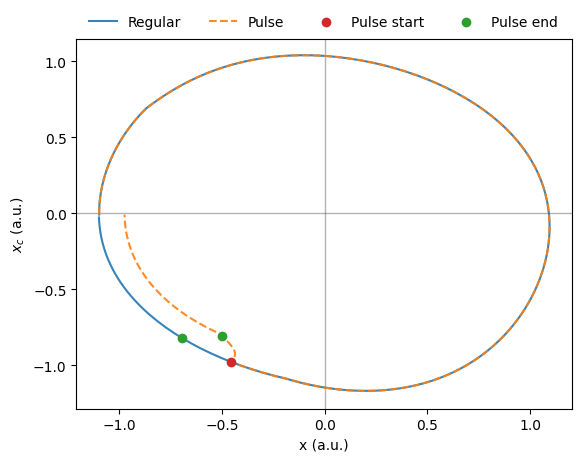

In [ ]:
#| echo: false
regular_x = regular_trajectory.states[:, 0]
regular_xc = regular_trajectory.states[:, 1]
regular_x_peaks, _ = find_peaks(-regular_x)
regular_x = regular_x[regular_x_peaks[0]: regular_x_peaks[1]]
regular_xc = regular_xc[regular_x_peaks[0]: regular_x_peaks[1]]

pulse_x = pulse_trajectory.states[:, 0]
pulse_xc = pulse_trajectory.states[:, 1]
pulse_x_peaks, _ = find_peaks(-pulse_x)
pulse_x = pulse_x[pulse_x_peaks[0]: pulse_x_peaks[2]+1]
pulse_xc = pulse_xc[pulse_x_peaks[0]: pulse_x_peaks[2]+1]

plt.plot(regular_x, regular_xc, label='Regular', alpha=0.9)
plt.plot(pulse_x, pulse_xc, label='Pulse', alpha=0.9, linestyle='--')

pulse_start_idx = np.where(time == pulse_start)[0][0] - 1
pulse_end_idx = np.where(time == pulse_end)[0][0] - 1

plt.scatter(regular_trajectory.states[pulse_start_idx, 0], 
            regular_trajectory.states[pulse_start_idx, 1], 
            color='tab:red', label='Pulse start', zorder=2)
plt.scatter(regular_trajectory.states[pulse_end_idx, 0], 
            regular_trajectory.states[pulse_end_idx, 1], 
            color='tab:green', label='Pulse end', zorder=2)
plt.scatter(pulse_trajectory.states[pulse_end_idx, 0], 
            pulse_trajectory.states[pulse_end_idx, 1], 
            color='tab:green', zorder=2)

# place legends at the top on 5 columns outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.1), ncols=4, frameon=False)

plt.plot([-1.5, 1.5], [0, 0], color='black', lw=1, zorder=0, alpha=0.3)
plt.plot([0, 0], [-1.5, 1.5], color='black', lw=1, zorder=0, alpha=0.3)

plt.xlabel('x (a.u.)')
plt.ylabel('$x_c$ (a.u.)')

min_x = 1.1 * min(regular_trajectory.states[:, 0])
max_x = 1.1 * max(regular_trajectory.states[:, 0])
min_y = 1.1 * min(regular_trajectory.states[:, 1])
max_y = 1.1 * max(regular_trajectory.states[:, 1])

plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y);

Here we can also observe that the amplitude of the clock is reduced after the pulse. To calculate this we do the following

In [ ]:
from circadian.utils import amplitude_percent_change

In [ ]:
regular_amplitude = model.amplitude(regular_trajectory, pulse_end)
pulse_amplitude = model.amplitude(pulse_trajectory, pulse_end)

amplitude_change = amplitude_percent_change(regular_amplitude, pulse_amplitude)
print(f'Amplitude change: {amplitude_change:.2f}%') #| hide_line

Amplitude change: -12.40%


So the pulse both delays the clock and reduces its amplitude. We can now calculate the phase response curve by repeating this process for different pulse times. We will also store the amplitude change information for the [following section](#Building-amplitude-response-curves).

In [ ]:
days = 2.5
dt = 0.02 # hours. We need a smaller dt to get a smooth phase response curve
time = np.arange(0, 24 * days, dt)
pulse_num = 150
pulse_lux = 1e4
pulse_duration = 1 # hour
start_values = np.linspace(24, 48, pulse_num)


for idx,model in enumerate(model_list):
    simulation_result[str(model)] = {
        'cbtmin': np.NaN,
        'phase_response': [],
        'amplitude_response': [],
    }
    # create the reference trajectory
    regular_schedule = LightSchedule.Regular(regular_lux, lights_on=8, lights_off=24)
    regular_light = regular_schedule(time)
    regular_trajectory = model(time, equilibrium_states[idx], regular_light)

    # calculate cbt to use as pulse start time reference
    cbtmin = model.cbt(regular_trajectory)[1]
    simulation_result[str(model)]['cbtmin'] = cbtmin

    for pulse_start in start_values:
        schedule = LightSchedule.Regular(regular_lux, lights_on=8, lights_off=24)
        schedule += LightSchedule.from_pulse(pulse_lux, pulse_start, pulse_duration)
        light_input = schedule(time)
        pulse_trajectory = model(time, equilibrium_states[idx], light_input)

        pulse_end = pulse_start + pulse_duration

        regular_phase = model.phase(regular_trajectory, pulse_end)
        pulse_phase = model.phase(pulse_trajectory, pulse_end)
        phase_diff = phase_difference(regular_phase, pulse_phase)
        simulation_result[str(model)]['phase_response'].append(phase_diff)

        regular_amplitude = model.amplitude(regular_trajectory, pulse_end)
        pulse_amplitude = model.amplitude(pulse_trajectory, pulse_end)
        amplitude_change = amplitude_percent_change(regular_amplitude, pulse_amplitude)
        simulation_result[str(model)]['amplitude_response'].append(amplitude_change)

# convert phase differences from radians to hours
period = 24.2 # hours
for model in model_list:
    phase_response = simulation_result[str(model)]['phase_response']
    phase_response = np.array(phase_response) * period / (2 * np.pi)
    simulation_result[str(model)]['phase_response'] = phase_response

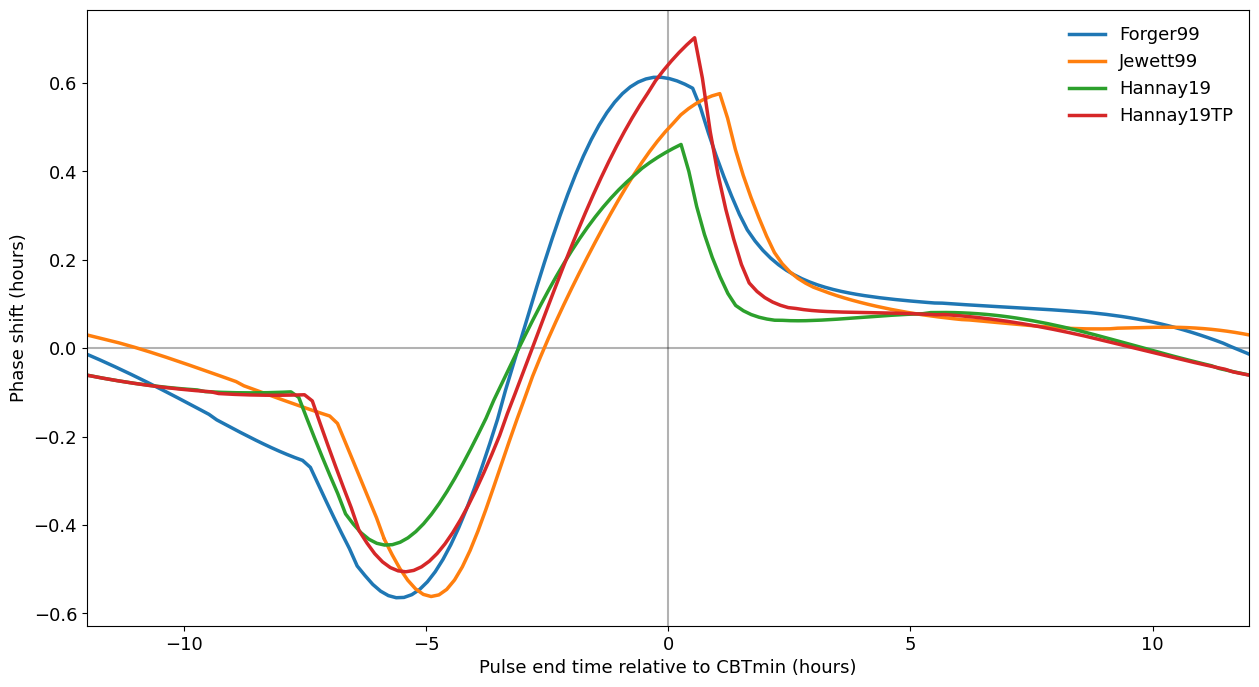

In [ ]:
#| echo: false
# plot phase response curve
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

for idx,model in enumerate(model_list):
    relative_time = start_values - simulation_result[str(model)]['cbtmin']
    # little trick to center the plot
    x = np.concatenate((relative_time, relative_time + 24))
    y = np.concatenate((simulation_result[str(model)]['phase_response'],
                        simulation_result[str(model)]['phase_response']))
    plt.plot(x - 24 - pulse_duration, y, label=str(model), lw=2.5)


# vertical line on 0
plt.axvline(x=0, color='black', zorder=0, alpha=0.3)
plt.axhline(y=0, color='black', zorder=0, alpha=0.3)
plt.xlabel('Pulse end time relative to CBTmin (hours)', fontsize=13)
plt.ylabel('Phase shift (hours)', fontsize=13)
plt.xlim(-12, 12)
# increase all font sizes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13, frameon=False)
plt.show()

This is the phase response curve for four different models. On the y-axis we have how much the phase of the circadian clock changes when the pulse ends. Positive values mean the clock is advanced with respect to an unperturbed case. On the x-axis we have the pulse end time relative to the core body temperature minimum (CBTmin). When the pulse ends close to CBTmin (x-axis value of 0) the phase of the clock is maximally advanced. On the contrary, when the pulse ends five hours before CBTmin, the clock is delayed the most. The overall shape of the response is similar between models.

# Building amplitude response curves

Our previous simulation shows that not only the phase of the clock changes after a pulse, but also its amplitude. We already calculated the amplitude change in the previous section so we can plot the result

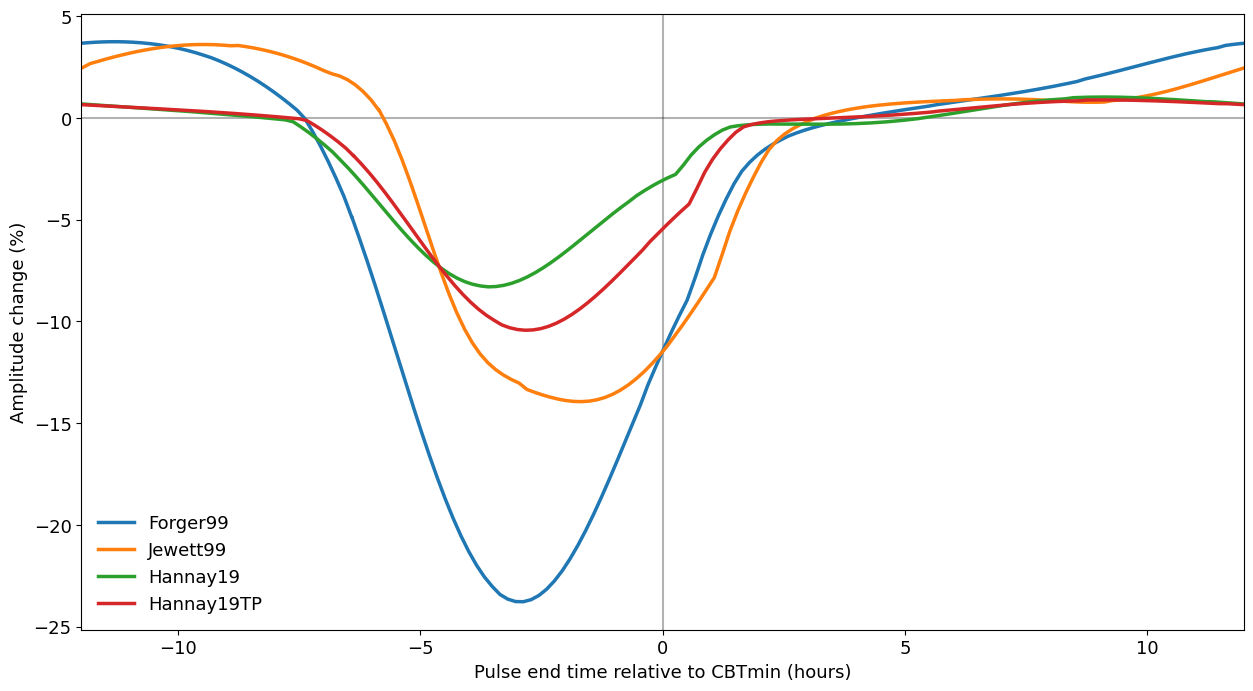

In [ ]:
#| echo: false
# plot amplitude response curve
fig, axs = plt.subplots(1, 1, figsize=(15, 8))

for idx,model in enumerate(model_list):
    relative_time = start_values - simulation_result[str(model)]['cbtmin']
    # little trick to center the plot
    x = np.concatenate((relative_time, relative_time + 24))
    y = np.concatenate((simulation_result[str(model)]['amplitude_response'],
                        simulation_result[str(model)]['amplitude_response']))
    plt.plot(x - 24 - pulse_duration, y, label=str(model), lw=2.5)


# vertical line on 0
plt.axvline(x=0, color='black', zorder=0, alpha=0.3)
plt.axhline(y=0, color='black', zorder=0, alpha=0.3)
plt.xlabel('Pulse end time relative to CBTmin (hours)', fontsize=13)
plt.ylabel('Amplitude change (%)', fontsize=13)
plt.xlim(-12, 12)
# increase all font sizes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13, frameon=False)
plt.show()

The models still have a similar response: all of them show a decrease in amplitude four hours before CBTmin. However, the magnitude of change in amplitude varies between them. For a more detailed discussion we refer the reader to [Hannay et al. (2019)](https://doi.org/10.1177/0748730419878298).